In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
apt = pd.read_csv('apartments_for_sale_sao_paulo.csv')

In [5]:
display(apt)

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion
0,17121501499.00,695.00,AP 94 E 2 VGS,VL ANDRADE,5727230.00,buy_and_sell,720000.00,2021-12-21 00:00:00,178.00,Apartment in Condominium (Requires Ideal Fract...,100.00
1,5101800457.00,503.00,CASA B,VILA BELA,3144080.00,buy_and_sell,500000.00,2021-12-21 00:00:00,65.00,Residence,100.00
2,6111300253.00,921.00,NaN,NaN,3639000.00,buy_and_sell,410000.00,2021-12-21 00:00:00,135.00,Residence,100.00
3,6902901351.00,17.00,NaN,V PAULICEIA,2302030.00,buy_and_sell,650000.00,2021-12-27 00:00:00,119.00,Residence,100.00
4,18312000312.00,100.00,CASA 16 E VG,RESID VILLA FIORE,5782470.00,buy_and_sell,413000.00,2021-12-22 00:00:00,63.00,Residence,100.00
...,...,...,...,...,...,...,...,...,...,...,...
140896,11033800421.00,251.00,CASA 5,NaN,3671000.00,buy_and_sell,345000.00,2023-07-28 00:00:00,60.00,Residence,100.00
140897,2000302092.00,665.00,AP 84,TORRE A,1137010.00,buy_and_sell,1450000.00,2023-07-31 00:00:00,239.00,Apartment in Condominium (Requires Ideal Fract...,100.00
140898,19603709033.00,300.00,AP 32 TORRE B,BELENZINHO,3015010.00,buy_and_sell,400000.00,2023-06-30 00:00:00,88.00,Apartment in Condominium (Requires Ideal Fract...,100.00
140899,4720802303.00,113.00,AP 12 E 2 VGS,JABAQUARA,4306090.00,buy_and_sell,784000.00,2023-06-29 00:00:00,154.00,Apartment in Condominium (Requires Ideal Fract...,100.00


In [6]:
apt.isnull().sum()

registration_number           0
number                        0
complement                22330
neighborhood              48386
postal_code                   0
transaction_nature            0
transaction_value             0
transaction_date              0
built_area                    0
use_description               0
transmitted_proportion        0
dtype: int64

In [7]:
apt[['transaction_nature','use_description']].value_counts().to_frame() #Show in a df the number of rept of 
                                                                        # each variable value.  

0
transaction_nature use_description                                          
buy_and_sell       Apartment in Condominium (Requires Ideal Fraction)  81701
                   Residence                                           26562
                   Garage (Autonomous Unit) in Residential Condomi...  10605
                   Office/Clinic in Condominium (Autonomous Unit R...   6031
                   Collective Residence, Exclusive Slum (More Than...   2849
                   Land                                                 2358
                   Commercial Use Flat (Similar to Hotel)               2330
                   Store                                                1333
                   Residence and Other Use (Residential Predominance)   1110
                   Store and Residence (Commercial Predominance)         849
                   Garage (Autonomous Unit) in Office, Clinic, or ...    812
                   Office or Clinic Building, Not in Condominium, ...    801
                   Store in Condominium Building (Autonomous Unit ...    687
                   Other Buildings of the Type, with Multiple Use        615
                   Residential Flat in Condominium (Requires Ideal...    383
                   Hotel, Boarding House or Hostel                       340
                   Industry                                              306
                   Workshop                                              222
                   General Warehouses and Depots                         210
                   Garage (Autonomous Unit) in Garage Building (Re...    186
                   School                                                143
                   Garage (Exclusive in Condominium Building)             97
                   Service Station                                        66
                   Apartment Building, Not in Condominium, for Exc...     63
                   Apartment Building, Not in Condominium, Mixed U...     61
                   Temple                                                 37
                   Hospital, Outpatient Clinic, Health Clinic and ...     31
                   Unknown                                                29
                   CORTIÇO (HABITAÇÃO COLETIVA SUBNORMAL)                 18
                   ASILO, ORFANATO, CRECHE, SEMINÁRIO OU CONVENTO         17
                   Other Buildings of the Type with Multiple Use          17
                   Mixed-Use Building, Predominantly Non-Residenti...     12
                   Radio Broadcasting Station, Television Station ...     10
                   Cinema, Theater, Entertainment Venue, Club or S...     10

We must remove registration that has NaNs in df.

In [8]:
apt = apt.dropna()           # Removing NaNs.

In [9]:
apt.isnull().sum()           # NaNs removed.

registration_number       0
number                    0
complement                0
neighborhood              0
postal_code               0
transaction_nature        0
transaction_value         0
transaction_date          0
built_area                0
use_description           0
transmitted_proportion    0
dtype: int64

In [10]:
apt[['transaction_value','built_area']].describe()

,transaction_value,built_area
count,80544.00,80544.00
mean,621924.87,128.13
std,1382146.71,184.50
min,0.01,0.00
25%,220000.00,65.00
50%,350000.00,98.00
75%,638559.39,146.00
max,84639423.71,17008.00


transaction_value       Axes(0.125,0.11;0.352273x0.77)
built_area           Axes(0.547727,0.11;0.352273x0.77)
dtype: object

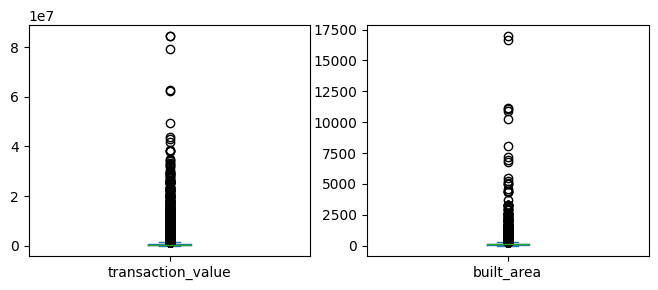

In [11]:
apt[['transaction_value','built_area']].plot(kind = 'box', figsize = (8,3), subplots = True)

At this point we have to filter the dataset removing all the rows that no contains 'Residence' in 'use_description' column.

In [12]:
apt = apt[apt['use_description'] == 'Residence']

In [13]:
display(apt)

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion
1,5101800457.00,503.00,CASA B,VILA BELA,3144080.00,buy_and_sell,500000.00,2021-12-21 00:00:00,65.00,Residence,100.00
4,18312000312.00,100.00,CASA 16 E VG,RESID VILLA FIORE,5782470.00,buy_and_sell,413000.00,2021-12-22 00:00:00,63.00,Residence,100.00
8,12409110699.00,155.00,CASA 16 A,PIRITUBA,5171600.00,buy_and_sell,380000.00,2021-12-22 00:00:00,178.00,Residence,100.00
28,10920000478.00,144.00,JD DA FONTE,TREMEMBE,2355000.00,buy_and_sell,1050000.00,2021-12-21 00:00:00,357.00,Residence,100.00
33,5914000998.00,650.00,CASA 05,VILA RE,3662020.00,buy_and_sell,345000.00,2021-12-23 00:00:00,60.00,Residence,100.00
...,...,...,...,...,...,...,...,...,...,...,...
140835,12209900432.00,10.00,LT 10B QD N,VL MARACANA,5847500.00,buy_and_sell,660000.00,2023-07-12 00:00:00,208.00,Residence,100.00
140841,17019401200.00,207.00,CS 13,CONDOMINIO,5713570.00,buy_and_sell,690000.00,2023-07-21 00:00:00,214.00,Residence,100.00
140848,11342700359.00,50.00,CS 3,VL. COPACABANA,3687170.00,buy_and_sell,375000.00,2023-07-24 00:00:00,68.00,Residence,100.00
140864,9515300134.00,423.00,LT 14 QD 47 A,INTERLAGOS,4786035.00,buy_and_sell,1500000.00,2023-07-31 00:00:00,308.00,Residence,100.00


In [14]:
apt[['transaction_value','built_area']].describe()

,transaction_value,built_area
count,6465.00,6465.00
mean,620843.92,138.21
std,1010448.01,120.88
min,0.01,17.00
25%,267535.00,72.00
50%,390000.00,107.00
75%,600000.00,159.00
max,25400000.00,3295.00


transaction_value       Axes(0.125,0.11;0.352273x0.77)
built_area           Axes(0.547727,0.11;0.352273x0.77)
dtype: object

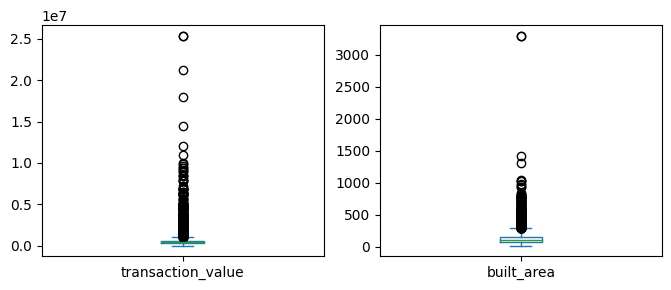

In [15]:
apt[['transaction_value','built_area']].plot(kind = 'box', figsize = (8,3), subplots = True)

We must remove some outliers. Check max and min 'built_area' and 'transaction_value' variables.

In [16]:
apt = apt[~((apt['transaction_value'] < 10000.00)|      #I assume that the values in these 
    (apt['built_area'] < 5.00)|                         # conditionals are not reasonable values.
   (apt['built_area'] > 1000.00))]

transaction_value       Axes(0.125,0.11;0.352273x0.77)
built_area           Axes(0.547727,0.11;0.352273x0.77)
dtype: object

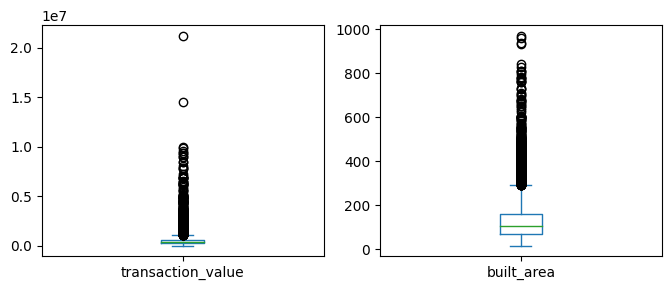

In [17]:
apt[['transaction_value','built_area']].plot(kind = 'box', figsize = (8,3), subplots = True)

In [18]:
display(apt)    

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion
1,5101800457.00,503.00,CASA B,VILA BELA,3144080.00,buy_and_sell,500000.00,2021-12-21 00:00:00,65.00,Residence,100.00
4,18312000312.00,100.00,CASA 16 E VG,RESID VILLA FIORE,5782470.00,buy_and_sell,413000.00,2021-12-22 00:00:00,63.00,Residence,100.00
8,12409110699.00,155.00,CASA 16 A,PIRITUBA,5171600.00,buy_and_sell,380000.00,2021-12-22 00:00:00,178.00,Residence,100.00
28,10920000478.00,144.00,JD DA FONTE,TREMEMBE,2355000.00,buy_and_sell,1050000.00,2021-12-21 00:00:00,357.00,Residence,100.00
33,5914000998.00,650.00,CASA 05,VILA RE,3662020.00,buy_and_sell,345000.00,2021-12-23 00:00:00,60.00,Residence,100.00
...,...,...,...,...,...,...,...,...,...,...,...
140835,12209900432.00,10.00,LT 10B QD N,VL MARACANA,5847500.00,buy_and_sell,660000.00,2023-07-12 00:00:00,208.00,Residence,100.00
140841,17019401200.00,207.00,CS 13,CONDOMINIO,5713570.00,buy_and_sell,690000.00,2023-07-21 00:00:00,214.00,Residence,100.00
140848,11342700359.00,50.00,CS 3,VL. COPACABANA,3687170.00,buy_and_sell,375000.00,2023-07-24 00:00:00,68.00,Residence,100.00
140864,9515300134.00,423.00,LT 14 QD 47 A,INTERLAGOS,4786035.00,buy_and_sell,1500000.00,2023-07-31 00:00:00,308.00,Residence,100.00


In [19]:
apt[apt.duplicated()]        # Checking for duplicate registration

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion
4302,19213400046.00,4.00,QD G LT 4,ITAIM PAULISTA,8141620.00,buy_and_sell,112583.00,2022-01-26 00:00:00,60.00,Residence,100.00
131147,14827800153.00,108.00,JD CARVALHO,VILA RICA,3912270.00,buy_and_sell,300000.00,2023-04-14 00:00:00,41.00,Residence,100.00
134519,18513900094.00,73.00,LT 9 QD E,JD GUARAU,5544220.00,buy_and_sell,420000.00,2023-06-29 00:00:00,70.00,Residence,100.00
137441,14404202457.00,2381.00,CS 5 E VG,VILA CARMOSINA,8290001.00,buy_and_sell,310000.00,2023-07-03 00:00:00,65.00,Residence,100.00


In [20]:
apt = apt.drop_duplicates()

In [21]:
apt[apt.duplicated()] 

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion


In [22]:
apt['transaction_date'] = pd.to_datetime(apt['transaction_date'],    # converting the 'transaction_date' column 
                                         dayfirst = True)            # to a column of type 'datetime' to obtain 
                                                                     # the appropriate format.

In [23]:
apt.dtypes

registration_number              float64
number                           float64
complement                        object
neighborhood                      object
postal_code                      float64
transaction_nature                object
transaction_value                float64
transaction_date          datetime64[ns]
built_area                       float64
use_description                   object
transmitted_proportion           float64
dtype: object

In [24]:
display(apt)

,registration_number,number,complement,neighborhood,postal_code,transaction_nature,transaction_value,transaction_date,built_area,use_description,transmitted_proportion
1,5101800457.00,503.00,CASA B,VILA BELA,3144080.00,buy_and_sell,500000.00,2021-12-21,65.00,Residence,100.00
4,18312000312.00,100.00,CASA 16 E VG,RESID VILLA FIORE,5782470.00,buy_and_sell,413000.00,2021-12-22,63.00,Residence,100.00
8,12409110699.00,155.00,CASA 16 A,PIRITUBA,5171600.00,buy_and_sell,380000.00,2021-12-22,178.00,Residence,100.00
28,10920000478.00,144.00,JD DA FONTE,TREMEMBE,2355000.00,buy_and_sell,1050000.00,2021-12-21,357.00,Residence,100.00
33,5914000998.00,650.00,CASA 05,VILA RE,3662020.00,buy_and_sell,345000.00,2021-12-23,60.00,Residence,100.00
...,...,...,...,...,...,...,...,...,...,...,...
140835,12209900432.00,10.00,LT 10B QD N,VL MARACANA,5847500.00,buy_and_sell,660000.00,2023-07-12,208.00,Residence,100.00
140841,17019401200.00,207.00,CS 13,CONDOMINIO,5713570.00,buy_and_sell,690000.00,2023-07-21,214.00,Residence,100.00
140848,11342700359.00,50.00,CS 3,VL. COPACABANA,3687170.00,buy_and_sell,375000.00,2023-07-24,68.00,Residence,100.00
140864,9515300134.00,423.00,LT 14 QD 47 A,INTERLAGOS,4786035.00,buy_and_sell,1500000.00,2023-07-31,308.00,Residence,100.00


In [25]:
apt.drop(columns=['number','neighborhood', 'complement', 'transaction_nature','use_description','transmitted_proportion'], inplace=True)

In [26]:
display(apt)

,registration_number,postal_code,transaction_value,transaction_date,built_area
1,5101800457.00,3144080.00,500000.00,2021-12-21,65.00
4,18312000312.00,5782470.00,413000.00,2021-12-22,63.00
8,12409110699.00,5171600.00,380000.00,2021-12-22,178.00
28,10920000478.00,2355000.00,1050000.00,2021-12-21,357.00
33,5914000998.00,3662020.00,345000.00,2021-12-23,60.00
...,...,...,...,...,...
140835,12209900432.00,5847500.00,660000.00,2023-07-12,208.00
140841,17019401200.00,5713570.00,690000.00,2023-07-21,214.00
140848,11342700359.00,3687170.00,375000.00,2023-07-24,68.00
140864,9515300134.00,4786035.00,1500000.00,2023-07-31,308.00


We have now to put the postal code into the format '0XXXX-XXX'

In [27]:
apt['postal_code'] = apt['postal_code'].astype(str).str.replace('.0', '', regex=False)  # Remove the '.00' 

apt['postal_code'] = apt['postal_code'].str.replace(r'(\d{4})(\d{3})', r'\1-\2', regex=True)  # Formats as 'XXXX-XXX'

In [28]:
apt['postal_code'] = '0' + apt['postal_code']      # adding 0 first postition

In [29]:
display(apt)

,registration_number,postal_code,transaction_value,transaction_date,built_area
1,5101800457.00,03144-080,500000.00,2021-12-21,65.00
4,18312000312.00,05782-470,413000.00,2021-12-22,63.00
8,12409110699.00,05171-600,380000.00,2021-12-22,178.00
28,10920000478.00,02355-000,1050000.00,2021-12-21,357.00
33,5914000998.00,03662-020,345000.00,2021-12-23,60.00
...,...,...,...,...,...
140835,12209900432.00,05847-500,660000.00,2023-07-12,208.00
140841,17019401200.00,05713-570,690000.00,2023-07-21,214.00
140848,11342700359.00,03687-170,375000.00,2023-07-24,68.00
140864,9515300134.00,04786-035,1500000.00,2023-07-31,308.00


In [30]:
apt['registration_number'] = apt['registration_number'].astype(str).str.replace('.00', '', regex=False)
apt[['transaction_value','built_area']] = apt[['transaction_value','built_area']].astype(int)

In [31]:
display(apt)

,registration_number,postal_code,transaction_value,transaction_date,built_area
1,5101800457.0,03144-080,500000,2021-12-21,65
4,18312000312.0,05782-470,413000,2021-12-22,63
8,12409110699.0,05171-600,380000,2021-12-22,178
28,10920000478.0,02355-000,1050000,2021-12-21,357
33,5914000998.0,03662-020,345000,2021-12-23,60
...,...,...,...,...,...
140835,12209900432.0,05847-500,660000,2023-07-12,208
140841,17019401200.0,05713-570,690000,2023-07-21,214
140848,11342700359.0,03687-170,375000,2023-07-24,68
140864,9515300134.0,04786-035,1500000,2023-07-31,308


In [32]:
apt[['transaction_value','built_area']].corr()               #Correlation between variables.

,transaction_value,built_area
transaction_value,1.00,0.69
built_area,0.69,1.00


In [33]:
import statsmodels.api as sts         

#importing statsmodels python's library, 
#to perform better statistical analysis.




y = apt['transaction_value']          #naming x and y before putting into a linear regression (OLS) model.
x = apt['built_area']

In [34]:
x = sts.add_constant(x)

In [35]:
model = sts.OLS(y,x).fit()         #Creating a OLS model.

In [36]:
model.params

const        -167163.04
built_area      5733.51
dtype: float64

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      transaction_value   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     5685.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:35:04   Log-Likelihood:                -93272.
No. Observations:                6316   AIC:                         1.865e+05
Df Residuals:                    6314   BIC:                         1.866e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.672e+05   1.31e+04    -12.783      0.000   -1.93e+05   -1.42e+05
built_area  5733.5106     76.040     75.401      0.000    5584.446    5882.576
==============================================================================
Omnibus:                     8286.748   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4624645.458
Skew:                           6.923   Prob(JB):                         0.00
Kurtosis:                     134.838   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Guilherme Barros\AppData\Local\Temp\ipykernel_17568\3126306134.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(tick * 1e-6)} Mi' for tick in plt.yticks()[0]])


<function matplotlib.pyplot.show(close=None, block=None)>

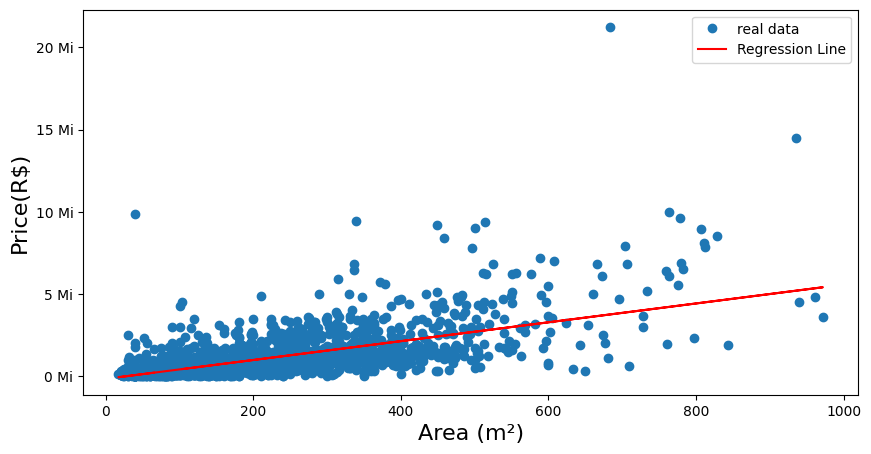

In [38]:
plt.figure(figsize = (10,5))
plt.xlabel('Area (m²)', size = 16)
plt.ylabel('Price(R$)', size = 16)
plt.plot(x['built_area'], y, "o", label = 'real data')
plt.plot(x['built_area'], model.fittedvalues, 'r-', label = 'Regression Line')
plt.gca().set_yticklabels([f'{int(tick * 1e-6)} Mi' for tick in plt.yticks()[0]])
plt.legend(loc = 'best')
plt.show

In [41]:
display(apt)

,registration_number,neighborhood,postal_code,transaction_value,transaction_date,built_area
1,5101800457.0,VILA BELA,03144-080,500000,2021-12-21,65
4,18312000312.0,RESID VILLA FIORE,05782-470,413000,2021-12-22,63
8,12409110699.0,PIRITUBA,05171-600,380000,2021-12-22,178
28,10920000478.0,TREMEMBE,02355-000,1050000,2021-12-21,357
33,5914000998.0,VILA RE,03662-020,345000,2021-12-23,60
...,...,...,...,...,...,...
140835,12209900432.0,VL MARACANA,05847-500,660000,2023-07-12,208
140841,17019401200.0,CONDOMINIO,05713-570,690000,2023-07-21,214
140848,11342700359.0,VL. COPACABANA,03687-170,375000,2023-07-24,68
140864,9515300134.0,INTERLAGOS,04786-035,1500000,2023-07-31,308


In [42]:
apt.to_csv('apt_SP_cleaned.csv',index = False)